# Under fitting

Underfitting, bir makine öğrenmesi modelinin hem eğitim verisinde hem de test verisinde düşük performans göstermesi durumudur.


### Underfitting Nasıl Anlaşılır?

1. **Eğitim ve Doğrulama Hataları:**
   - Hem eğitim hem de doğrulama verisinde yüksek hata oranları görülür. Eğitim sürecinde, modelin hatası zamanla belirgin şekilde azalmaz.

2. **Yetersiz Model Karmaşıklığı:**
   - Model, verideki karmaşık ilişkileri öğrenmek için yeterince kapasiteye sahip değilse, yani model çok basitse (örneğin, çok az sayıda parametre veya katman kullanılıyorsa), underfitting meydana gelebilir.

3. **Kısa Eğitim Süreci:**
   - Modelin yeterince uzun eğitilmemesi durumunda da underfitting oluşabilir. Bu, modelin veriyi tam olarak öğrenmesi için gerekli sayıda epoch'la eğitilmemesi anlamına gelir.

### Underfitting’i Önleme Yöntemleri

- **Model Karmaşıklığını Artırmak:**


- **Daha Uzun Eğitim:**


- **Özellik Mühendisliği (Feature Engineering):**


- **Veri Setini İyileştirmek:**

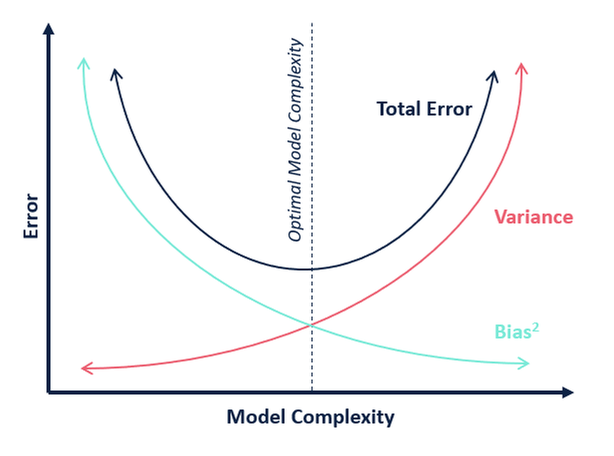

## Variance Bias


### Bias (Sapma) Nedir?

**Bias**, modelin eğitim verisindeki temel örüntüleri (patterns) yakalama konusundaki başarısızlığıdır. Bias, modelin gerçek dünya ilişkilerini yeterince öğrenememesi anlamına gelir. Genellikle şu durumlarda ortaya çıkar:

- **Basit Modeller:**
- **Underfitting:**

**Yüksek Bias:** Model, verideki karmaşık ilişkileri öğrenemez. Bu, hem eğitim hem de test verisinde kötü performansa yol açar.

### Variance (Varyans) Nedir?

**Variance**, modelin eğitim verisine ne kadar duyarlı olduğunu ifade eder. Yüksek varyans, modelin eğitim verisine aşırı uyum sağladığı (overfitting) anlamına gelir. Bu durumda, model eğitim verisinde çok iyi performans gösterir ancak yeni verilerde (test verisi gibi) düşük performans gösterir.

- **Karmaşık Modeller:**
- **Overfitting:**

**Yüksek Variance:** Model, eğitim verisine aşırı uyum sağlar ve bu yüzden yeni verilerde zayıf performans gösterir.

### Bias-Variance Tradeoff (Sapma-Varyans Dengesi)

**Bias-Variance Tradeoff** (Sapma-Varyans Dengesi), makine öğrenmesi modellerinin performansını değerlendirmek ve optimize etmek için önemli bir kavramdır. Modelin hata oranını anlamak ve optimize etmek için sapma (bias) ve varyans (variance) arasındaki dengeyi doğru bir şekilde kurmak gerekir. Bu kavramlar, modelin eğitimi sırasında oluşabilecek hataların nedenlerini anlamaya yardımcı olur.



- **Yüksek Bias, Düşük Variance:** Model basit olduğunda, genellikle yüksek bias (underfitting) ve düşük varyans olur.
- **Düşük Bias, Yüksek Variance:** Model karmaşık olduğunda, genellikle düşük bias ve yüksek varyans olur (overfitting).

Amaç, bias ve varyans arasındaki dengeyi bulmaktır. İdeal bir model, hem düşük bias hem de düşük varyansa sahip olmalı, yani eğitim verisindeki önemli örüntüleri yakalarken aynı zamanda yeni verilerde de iyi performans göstermelidir.

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Veri kümesini yükleyin
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


In [ ]:
# Veriyi normalize edin
x_train, x_test = x_train / 255.0, x_test / 255.0

In [ ]:
# Sınıf sayısını belirleyin
num_classes = len(np.unique(y_train))

In [ ]:
# Sınıf etiketlerini tek-sıcak vektörlere dönüştürün
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

In [ ]:
# Underfitting yapacak basit bir model oluşturalım
model = Sequential([
    Conv2D(8, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(32, activation='relu'),
    Dense(num_classes, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Modeli derleyin
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Modeli eğitin
history = model.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test))

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 43s 27ms/step - accuracy: 0.3014 - loss: 1.9197 - val_accuracy: 0.4616 - val_loss: 1.5040
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 71s 20ms/step - accuracy: 0.4792 - loss: 1.4481 - val_accuracy: 0.5026 - val_loss: 1.3940
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 16ms/step - accuracy: 0.5236 - loss: 1.3392 - val_accuracy: 0.5350 - val_loss: 1.3111
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 16ms/step - accuracy: 0.5511 - loss: 1.2707 - val_accuracy: 0.5402 - val_loss: 1.2895
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 16ms/step - accuracy: 0.5671 - loss: 1.2161 - val_accuracy: 0.5532 - val_loss: 1.2533
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 43s 17ms/step - accuracy: 0.5777 - loss: 1.1912 - val_accuracy: 0.5509 - val_loss: 1.2708
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 29s 18ms/step - accuracy: 0.5854 - loss: 1.1659 - val_accuracy: 0.5680 - val_loss: 1.2324
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 39s 17ms/step - accuracy: 0.5997 -

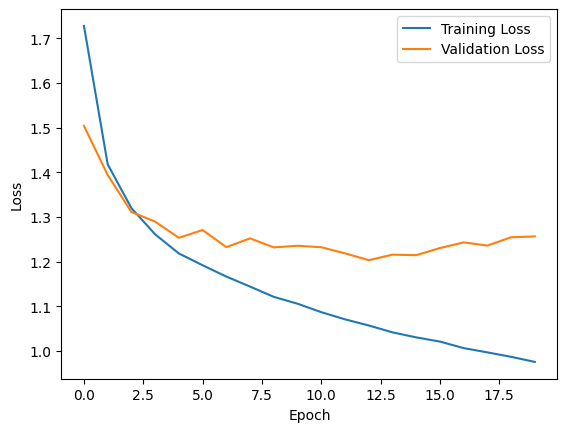

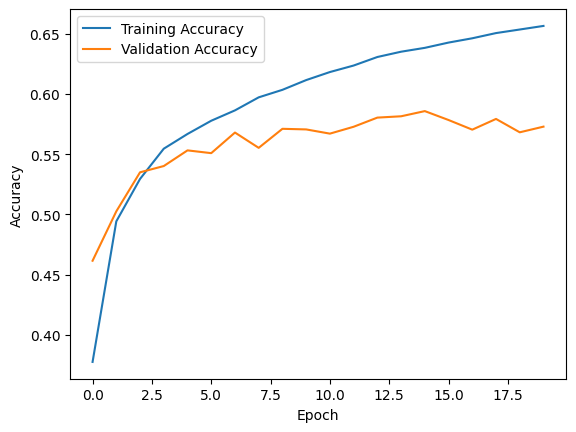

In [ ]:
# Eğitim ve doğrulama kayıplarını çizdirin
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Eğitim ve doğrulama doğruluklarını çizdirin
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Daha derin ve geniş bir model oluşturarak underfitting'i azaltmaya çalışalım

In [ ]:
model_2 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(num_classes, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Modeli tekrar derleyin
model_2.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Modeli tekrar eğitin
history_2 = model_2.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test))

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 87s 54ms/step - accuracy: 0.3759 - loss: 1.6870 - val_accuracy: 0.5768 - val_loss: 1.1811
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 53ms/step - accuracy: 0.6047 - loss: 1.1084 - val_accuracy: 0.6561 - val_loss: 0.9841
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 142s 53ms/step - accuracy: 0.6755 - loss: 0.9201 - val_accuracy: 0.6712 - val_loss: 0.9342
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 85s 54ms/step - accuracy: 0.7210 - loss: 0.7984 - val_accuracy: 0.6979 - val_loss: 0.8690
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 144s 56ms/step - accuracy: 0.7562 - loss: 0.6907 - val_accuracy: 0.7066 - val_loss: 0.8636
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 137s 53ms/step - accuracy: 0.7840 - loss: 0.6140 - val_accuracy: 0.7039 - val_loss: 0.8606
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 142s 53ms/step - accuracy: 0.8106 - loss: 0.5312 - val_accuracy: 0.7263 - val_loss: 0.8463
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 52ms/step - accuracy: 0.83

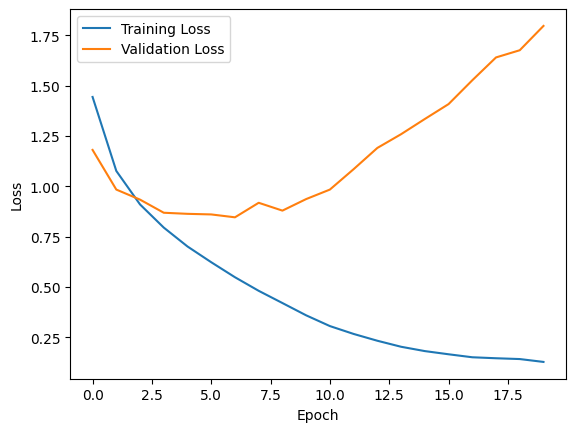

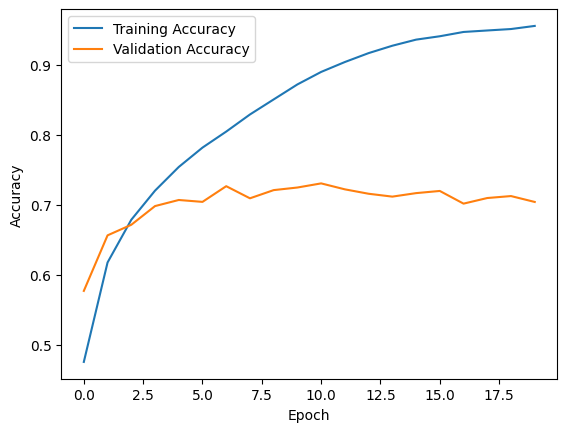

In [ ]:
# Eğitim ve doğrulama kayıplarını çizdirin
plt.plot(history_2.history['loss'], label='Training Loss')
plt.plot(history_2.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Eğitim ve doğrulama doğruluklarını çizdirin
plt.plot(history_2.history['accuracy'], label='Training Accuracy')
plt.plot(history_2.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Daha Uzun Eğitim Süresi


In [ ]:
# Modeli daha uzun süre eğitin
history_3 = model.fit(x_train, y_train, epochs=50, validation_data=(x_test, y_test))

Epoch 1/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - accuracy: 0.6639 - loss: 0.9556 - val_accuracy: 0.5759 - val_loss: 1.2549
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 38s 16ms/step - accuracy: 0.6663 - loss: 0.9469 - val_accuracy: 0.5706 - val_loss: 1.2579
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - accuracy: 0.6699 - loss: 0.9359 - val_accuracy: 0.5673 - val_loss: 1.2634
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - accuracy: 0.6725 - loss: 0.9275 - val_accuracy: 0.5798 - val_loss: 1.2398
Epoch 5/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.6797 - loss: 0.9211 - val_accuracy: 0.5860 - val_loss: 1.2415
Epoch 6/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 16ms/step - accuracy: 0.6803 - loss: 0.9165 - val_accuracy: 0.5731 - val_loss: 1.2571
Epoch 7/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 15ms/step - accuracy: 0.6842 - loss: 0.9030 - val_accuracy: 0.5773 - val_loss: 1.2590
Epoch 8/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 16ms/step - accuracy: 0.6905 -

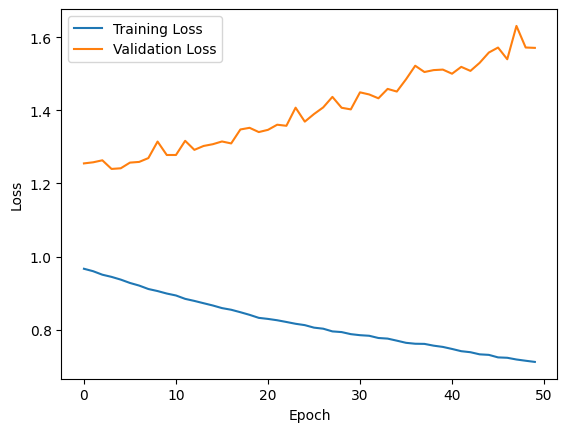

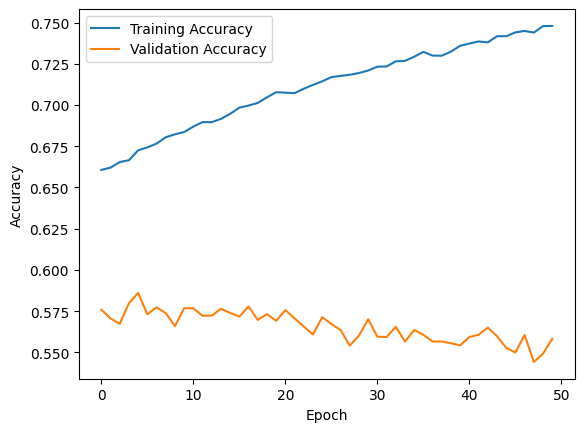

In [ ]:
# Eğitim ve doğrulama kayıplarını çizdirin
plt.plot(history_3.history['loss'], label='Training Loss')
plt.plot(history_3.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Eğitim ve doğrulama doğruluklarını çizdirin
plt.plot(history_3.history['accuracy'], label='Training Accuracy')
plt.plot(history_3.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Daha İyi Bir Öğrenme Oranı

In [ ]:
# Öğrenme oranını ayarlayın
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Modeli optimize öğrenme oranı
history_4 = model.fit(x_train, y_train, epochs=50, validation_data=(x_test, y_test))

Epoch 1/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 16ms/step - accuracy: 0.7815 - loss: 0.6377 - val_accuracy: 0.5608 - val_loss: 1.5834
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 16ms/step - accuracy: 0.7866 - loss: 0.6204 - val_accuracy: 0.5583 - val_loss: 1.5892
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 16ms/step - accuracy: 0.7880 - loss: 0.6230 - val_accuracy: 0.5615 - val_loss: 1.5856
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.7908 - loss: 0.6179 - val_accuracy: 0.5601 - val_loss: 1.6003
Epoch 5/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 16ms/step - accuracy: 0.7911 - loss: 0.6109 - val_accuracy: 0.5617 - val_loss: 1.5919
Epoch 6/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.7917 - loss: 0.6080 - val_accuracy: 0.5587 - val_loss: 1.6045
Epoch 7/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 16ms/step - accuracy: 0.7934 - loss: 0.6082 - val_accuracy: 0.5580 - val_loss: 1.6148
Epoch 8/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 16ms/step - accuracy: 0.7930 -

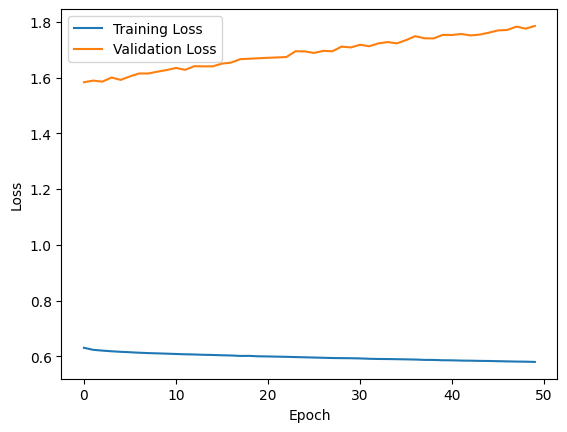

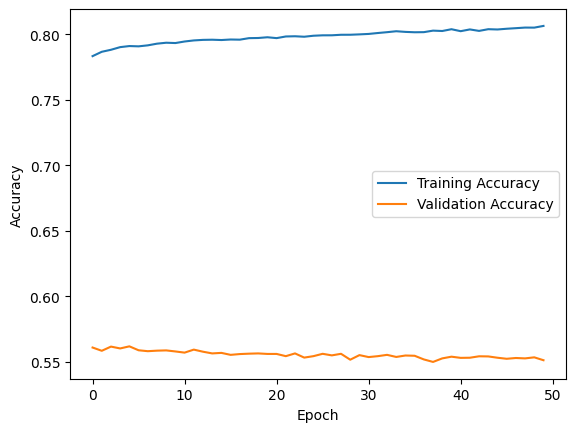

In [ ]:
# Eğitim ve doğrulama kayıplarını çizdirin
plt.plot(history_4.history['loss'], label='Training Loss')
plt.plot(history_4.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Eğitim ve doğrulama doğruluklarını çizdirin
plt.plot(history_4.history['accuracy'], label='Training Accuracy')
plt.plot(history_4.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Veri Artırma (Data Augmentation)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

# Veri artırma ile modeli eğitin
history_5 = model.fit(datagen.flow(x_train, y_train, batch_size=32),
                    epochs=50,
                    validation_data=(x_test, y_test))

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 63s 40ms/step - accuracy: 0.4062 - loss: 2.0756 - val_accuracy: 0.5009 - val_loss: 1.5595
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 39ms/step - accuracy: 0.4041 - loss: 1.7958 - val_accuracy: 0.5023 - val_loss: 1.5177
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 39ms/step - accuracy: 0.4002 - loss: 1.7461 - val_accuracy: 0.4901 - val_loss: 1.5128
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 61s 39ms/step - accuracy: 0.4099 - loss: 1.6944 - val_accuracy: 0.5002 - val_loss: 1.4798
Epoch 5/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 40ms/step - accuracy: 0.4148 - loss: 1.6629 - val_accuracy: 0.5050 - val_loss: 1.4430
Epoch 6/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 61s 39ms/step - accuracy: 0.4229 - loss: 1.6390 - val_accuracy: 0.5057 - val_loss: 1.4631
Epoch 7/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 62s 40ms/step - accuracy: 0.4252 - loss: 1.6276 - val_accuracy: 0.5096 - val_loss: 1.4404
Epoch 8/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 40ms/step - accuracy: 0.4294 - loss: 1.60

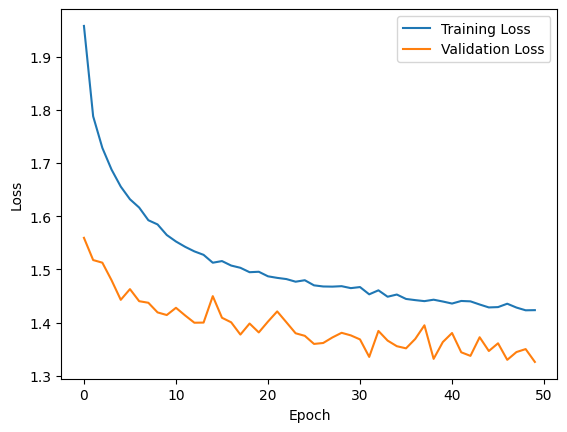

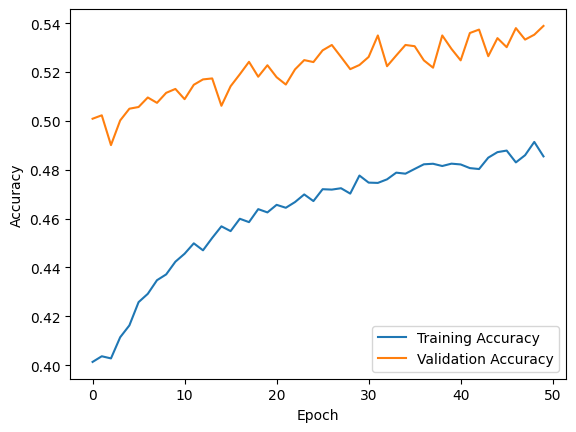

In [ ]:
# Eğitim ve doğrulama kayıplarını çizdirin
plt.plot(history_5.history['loss'], label='Training Loss')
plt.plot(history_5.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Eğitim ve doğrulama doğruluklarını çizdirin
plt.plot(history_5.history['accuracy'], label='Training Accuracy')
plt.plot(history_5.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Farklı Optimizasyon Algoritması
**RMSprop** (Root Mean Square Propagation), derin öğrenme modellerini eğitmek için kullanılan bir optimizasyon algoritmasıdır.
Bu algoritma, özellikle derin sinir ağlarında yaygın olarak kullanılır çünkü öğrenme hızını **otomatik** olarak ayarlayarak, daha dengeli bir eğitim süreci sunar.


RMSprop, her bir parametre için öğrenme oranını dinamik olarak ayarlayan bir adaptif öğrenme oranı yöntemidir.




### RMSprop'un Avantajları

1. **Dengeli Öğrenme:**
   - RMSprop, her parametre için öğrenme oranını otomatik olarak ayarlar, bu da daha dengeli ve stabil bir eğitim süreci sağlar.

2. **Kıvrımlı Yüzeylerde İyi Performans:**
   - RMSprop, çok boyutlu parametre alanlarında, özellikle de kıvrımlı yüzeylerde, öğrenme oranını optimize ederek eğitimi hızlandırır ve lokal minimumlardan kaçınabilir.

3. **Öğrenme Hızının Uyarlanabilirliği:**
   - Modelin parametrelerine ve eğitimin durumuna göre öğrenme hızı otomatik olarak ayarlandığı için, eğitim süreci daha verimli ve etkili olur.


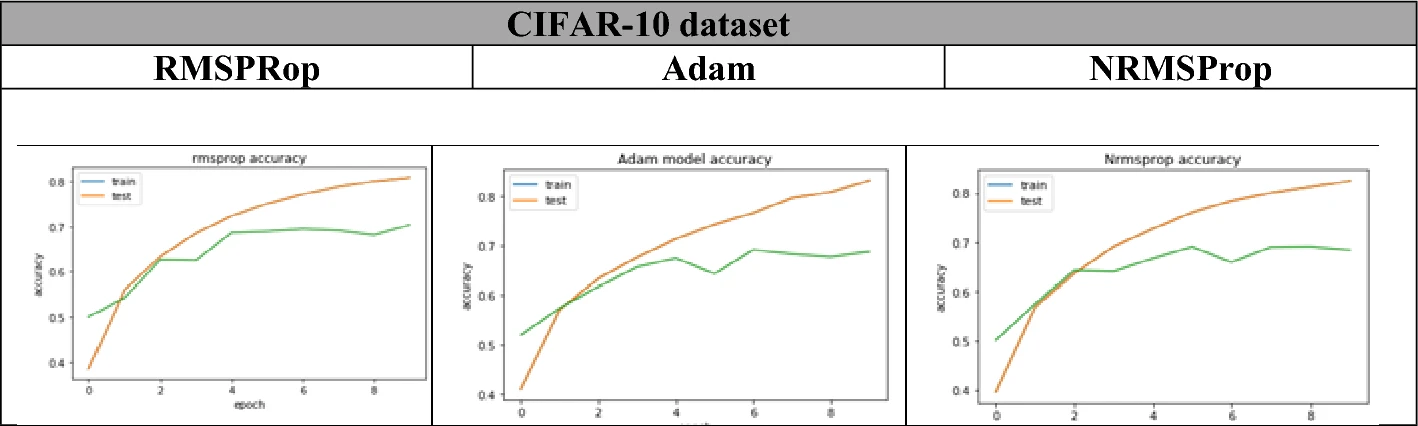

In [ ]:
# RMSprop optimizer kullanarak model
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Modeli optimize algoritması
history_6 = model.fit(x_train, y_train, epochs=50, validation_data=(x_test, y_test))

Epoch 1/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 16ms/step - accuracy: 0.6548 - loss: 0.9625 - val_accuracy: 0.5727 - val_loss: 1.4147
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.7222 - loss: 0.7804 - val_accuracy: 0.5760 - val_loss: 1.4173
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 16ms/step - accuracy: 0.7421 - loss: 0.7317 - val_accuracy: 0.5687 - val_loss: 1.4944
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 16ms/step - accuracy: 0.7495 - loss: 0.7119 - val_accuracy: 0.5713 - val_loss: 1.5402
Epoch 5/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 16ms/step - accuracy: 0.7521 - loss: 0.7075 - val_accuracy: 0.5609 - val_loss: 1.6443
Epoch 6/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 16ms/step - accuracy: 0.7532 - loss: 0.6960 - val_accuracy: 0.5602 - val_loss: 1.6381
Epoch 7/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 42s 16ms/step - accuracy: 0.7572 - loss: 0.6913 - val_accuracy: 0.5607 - val_loss: 1.6414
Epoch 8/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.7620 -

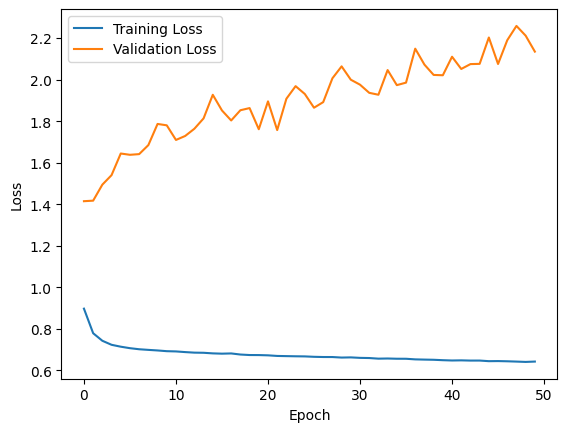

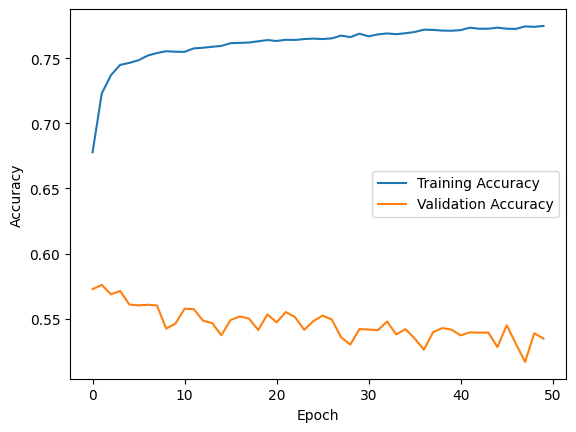

In [ ]:
# Eğitim ve doğrulama kayıplarını çizdirin
plt.plot(history_6.history['loss'], label='Training Loss')
plt.plot(history_6.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Eğitim ve doğrulama doğruluklarını çizdirin
plt.plot(history_6.history['accuracy'], label='Training Accuracy')
plt.plot(history_6.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Dropout veya Düzenleme (Regularization) Kullanımı

In [ ]:
from tensorflow.keras.regularizers import l2

model_2 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), kernel_regularizer=l2(0.001)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.001)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu', kernel_regularizer=l2(0.001)),
    Dense(num_classes, activation='softmax')
])


model_2.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
history_7 = model_2.fit(x_train, y_train, epochs=50, validation_data=(x_test, y_test))

Epoch 1/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 99s 62ms/step - accuracy: 0.3836 - loss: 1.9966 - val_accuracy: 0.3726 - val_loss: 2.0281
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 97s 62ms/step - accuracy: 0.5766 - loss: 1.3868 - val_accuracy: 0.5830 - val_loss: 1.3989
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 96s 61ms/step - accuracy: 0.6233 - loss: 1.2820 - val_accuracy: 0.6216 - val_loss: 1.2968
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 95s 61ms/step - accuracy: 0.6546 - loss: 1.2166 - val_accuracy: 0.6249 - val_loss: 1.3290
Epoch 5/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 143s 61ms/step - accuracy: 0.6709 - loss: 1.1689 - val_accuracy: 0.6679 - val_loss: 1.1779
Epoch 6/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 96s 61ms/step - accuracy: 0.6880 - loss: 1.1211 - val_accuracy: 0.6733 - val_loss: 1.1623
Epoch 7/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 143s 62ms/step - accuracy: 0.7083 - loss: 1.0722 - val_accuracy: 0.6922 - val_loss: 1.1288
Epoch 8/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 141s 62ms/step - accuracy: 0.713

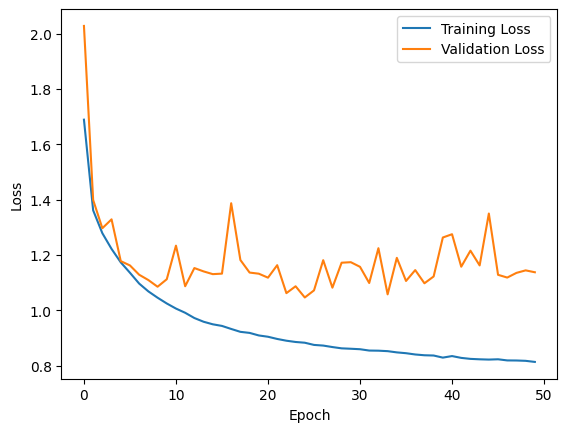

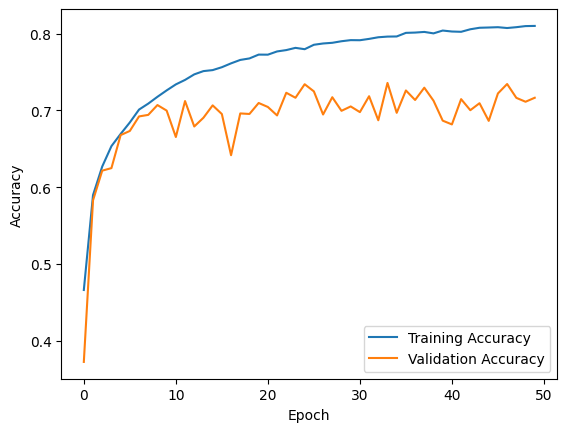

In [ ]:
# Eğitim ve doğrulama kayıplarını çizdirin
plt.plot(history_7.history['loss'], label='Training Loss')
plt.plot(history_7.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Eğitim ve doğrulama doğruluklarını çizdirin
plt.plot(history_7.history['accuracy'], label='Training Accuracy')
plt.plot(history_7.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()